In [1]:
library("car")
library("MASS")

Loading required package: carData


In [2]:
q2 <- read.table(
  "finaltr2.dat",
  header = F,
  as.is = T,
  col.names = c('a','b','c','d','e','f','g','h','i','j','response')
)
c = ncol(q2)
r = nrow(q2)

head(q2)

a,b,c,d,e,f,g,h,i,j,response
0,0.31726887,0.08564415,-0.038328750,-0.1034316,0.451137962,0.29156438,0.40869647,0.03699022,-0.19978583,12.5376679456862
0,-0.07586539,0.42858947,-0.191666936,0.1388422,-0.335911925,-0.43656450,-0.25639138,0.14838105,-0.02905920,12.1282890038756
0,-0.54463882,-0.32330902,-0.006278447,0.3875557,-0.054835043,-0.15208404,0.14170950,-0.19934626,-0.27475601,11.443279771575
0,0.15910182,-0.32566110,0.194561615,0.5240460,-0.007248998,0.04267573,0.05587233,0.06127263,-0.08145219,11.918650686791
0,0.40951628,-0.28005475,-0.065043078,-0.2017310,-0.024911327,-0.36233726,0.02520112,0.29770396,-0.31349363,11.5912462572279
0,0.03806039,-0.02319495,-0.178538576,0.2230465,0.134996281,-0.38646176,-0.24715376,-0.18564058,-0.17343779,11.8086772869799


In [3]:
train = q2[1:150,]
train$response = as.numeric(train$response)
test_x = q2[151:nrow(q2),][,c('a','b','c','d','e','f','g','h','i','j')]
test_y = read.table("finalprq2.dat", header = F, as.is = T, col.names = c('response'))

tail(train)
head(test_x)
head(test_y)

,a,b,c,d,e,f,g,h,i,j,response
145,1,-0.08124532,-0.343296214,0.3439812176,-0.468286495,0.29620779,0.064219170,0.12806953,-0.01214139,-0.2129433,1.787817
146,1,-0.35185880,-0.017483131,0.2262692897,0.101562900,-0.32684413,-0.152794456,-0.04506572,0.24741021,0.2641316,2.207490
147,1,-0.29211251,-0.167361958,-0.1551395307,0.809201210,-0.22561940,0.008867698,0.63824165,-0.04989697,-0.1817400,1.881518
148,1,-0.04706960,0.493856057,-0.1275468404,-0.003247908,-0.55089261,-0.179888550,0.11215797,-0.17362838,-0.2284914,1.847819
149,1,0.19509126,0.003592989,0.0762413103,-0.496084038,-0.11743275,0.252375246,-0.60407608,-0.12821984,0.1794245,1.861189
150,1,0.38014314,-0.081461434,-0.0009048289,-0.120139817,0.04659817,-0.321336283,0.02289315,-0.19212816,-0.1445646,1.745381


,a,b,c,d,e,f,g,h,i,j
151,1,0.2080971,-0.057638999,0.40436955,0.2639553,0.07525222,0.1867968,-0.23310783,0.57092971,0.27460180
152,1,-0.1660632,0.269646493,0.59110035,0.2431133,-0.42667841,-0.1377109,0.20480138,-0.16842619,0.05435028
153,1,-0.3316334,0.247591561,0.29314763,0.2601730,0.20685188,0.3086739,-0.63405266,-0.19406349,0.09863081
154,1,-0.1187533,-0.203502345,-0.07996623,-0.4856080,-0.07009134,-0.2365691,-0.15600307,0.44576895,0.03270255
155,1,0.3497937,0.003082094,0.07490065,0.4069797,-0.14087559,0.3275500,-0.15908129,0.17256562,-0.34424014
156,1,-0.1383298,0.156338508,-0.13796355,-0.4507050,-0.41640810,-0.3618307,0.07770573,0.01078559,0.24903746


response
2.158941
2.330793
2.081419
1.859214
2.066007
2.055083


In [4]:
test_x$index = 151:200

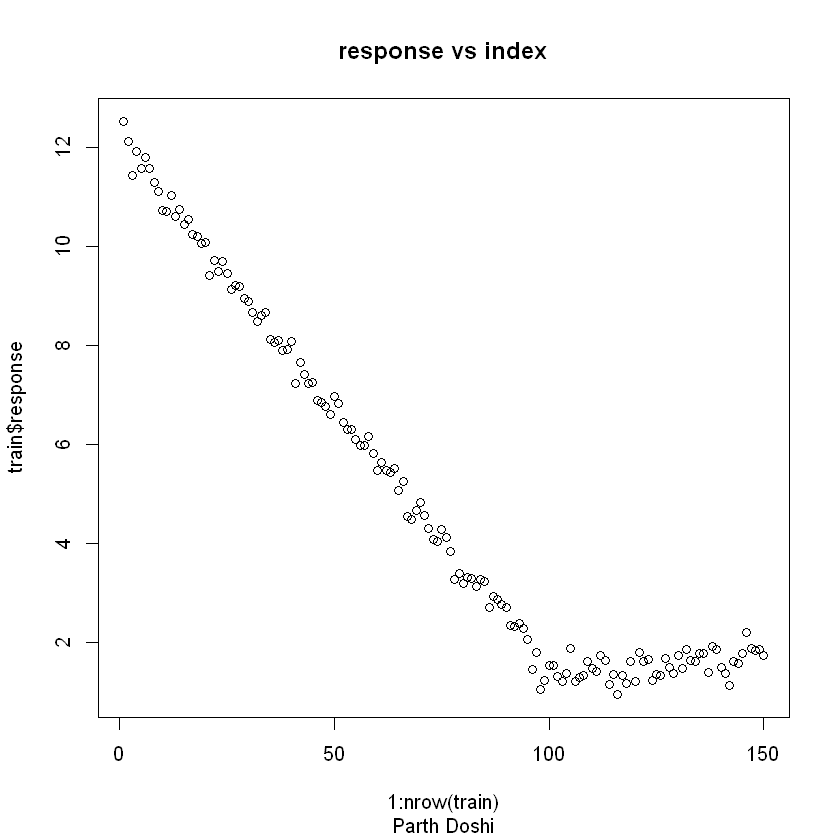

In [23]:
# plot(train$a, train$response)
# plot(train$b, train$response)
# plot(train$c, train$response)
# plot(train$d, train$response)
# plot(train$e, train$response)
# plot(train$f, train$response)
# plot(train$g, train$response)
# plot(train$h, train$response)
# plot(train$i, train$response)
# plot(train$j, train$response)
# plot(1:nrow(train), train$response)

# this shows us that we don't need the first 100 data points at all since it's not indicative of the test data
plot(1:nrow(train), train$response, main="response vs index", sub="Parth Doshi")
# plot(1:nrow(train), train$a)
# plot(1:nrow(train), train$b)
# plot(1:nrow(train), train$c)
# plot(1:nrow(train), train$d)
# plot(1:nrow(train), train$e)
# plot(1:nrow(train), train$f)
# plot(1:nrow(train), train$g)
# plot(1:nrow(train), train$h)
# plot(1:nrow(train), train$i)
# plot(1:nrow(train), train$j)

In [6]:
train$index = 1:nrow(train)

In [7]:
cor(train)

,a,b,c,d,e,f,g,h,i,j,response,index
a,1.0000000000,-0.1043562928,0.0271562368,-0.0008878257,-0.006946002,0.162239761,0.001468846,0.043014103,-0.05656492,0.010852915,-0.68926440,0.816514726
b,-0.1043562928,1.0000000000,0.0004704208,0.0257571244,0.064576726,0.225301189,0.014311415,-0.005270556,0.08155120,-0.017739068,0.09079654,-0.083477682
c,0.0271562368,0.0004704208,1.0000000000,0.0830226567,0.130307234,-0.150406753,0.170504266,0.024138052,-0.07452184,-0.064024945,-0.00404966,0.007139692
d,-0.0008878257,0.0257571244,0.0830226567,1.0000000000,-0.010033419,-0.010020144,0.054731082,0.039205652,-0.17413417,0.039479138,-0.05410987,0.033889687
e,-0.0069460025,0.0645767260,0.1303072342,-0.0100334192,1.000000000,0.033887507,-0.047356282,0.103170490,0.10385457,0.119111434,0.04431995,-0.039982227
f,0.1622397614,0.2253011885,-0.1504067534,-0.0100201444,0.033887507,1.000000000,0.124379282,0.063048865,0.05014753,-0.009175384,-0.10217196,0.112732084
g,0.0014688458,0.0143114149,0.1705042662,0.0547310818,-0.047356282,0.124379282,1.000000000,0.045788618,0.01391385,0.110764896,-0.01743826,-0.007712215
h,0.0430141030,-0.0052705559,0.0241380521,0.0392056521,0.103170490,0.063048865,0.045788618,1.000000000,-0.05653652,-0.044250548,-0.08045110,0.088930560
i,-0.0565649222,0.0815512042,-0.0745218431,-0.1741341688,0.103854574,0.050147532,0.013913847,-0.056536519,1.00000000,0.029597930,0.08621966,-0.109218416
j,0.0108529155,-0.0177390684,-0.0640249450,0.0394791380,0.119111434,-0.009175384,0.110764896,-0.044250548,0.02959793,1.000000000,-0.01832327,0.008638179


In [8]:
model2 = lm(response ~ a + index, data=train)
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,880.5429,880.5429388,980.1945,6.658204e-67
index,1,840.8431,840.8431456,936.0019,1.262814e-65
Residuals,147,132.0552,0.8983349,NA,NA


In [9]:
# pick only where a is 1
# this is fine since our test data only contains a=1
# if we want to know about a=0, we can train 2 different models
train[101:150,]

,a,b,c,d,e,f,g,h,i,j,response,index
101,1,-0.295941511,0.007056550,-0.1139495195,-0.164661448,0.0975239806,0.529865826,-0.41934898,-0.1851713938,-0.267283438,1.5344343,101
102,1,-0.097147210,0.198976021,-0.3016221115,-0.251076990,0.0547375365,0.181410980,0.42916255,0.3999851188,0.472017912,1.3090544,102
103,1,-0.491595832,0.125183306,-0.0212618571,-0.202212509,0.0631741853,0.360417884,0.11371204,0.5128847576,0.181418072,1.2191401,103
104,1,-0.408593681,0.110026749,-0.0850608435,0.328086118,-0.2498627604,-0.419795447,-0.08669499,0.0771398564,-0.118197693,1.3726263,104
105,1,0.181039858,0.049539298,0.5805486829,-0.373466325,-0.0615017889,-0.132609595,-0.38832368,-0.1139853921,-0.289910404,1.8843933,105
106,1,-0.030147571,0.161613939,0.1677411250,-0.069820494,-0.1135120139,-0.300126105,-0.47130581,-0.1560430854,-0.011614874,1.2037510,106
107,1,0.064341450,0.034883212,0.2946020756,0.236228678,0.1423530721,0.096548885,0.16574058,-0.0009989848,0.068141010,1.3040024,107
108,1,0.185731707,0.207425751,0.2103228710,0.222942914,0.0029735322,0.456855839,0.33698036,-0.4190630325,0.174533293,1.3278205,108
109,1,0.335043450,-0.236804180,0.1237750693,-0.074111281,0.1784820863,-0.357889765,0.18405877,0.4154307358,0.122329943,1.6168823,109
110,1,-0.139373513,0.128025174,0.0697359699,0.122211896,0.2508214475,0.235195320,-0.27947827,0.1796885064,-0.299273201,1.4749347,110


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
b,1,0.07315454,0.07315454,1.0119912,0.3204733
c,1,0.03101090,0.03101090,0.4289926,0.5162327
d,1,0.02719481,0.02719481,0.3762024,0.5431149
e,1,0.03093245,0.03093245,0.4279074,0.5167611
f,1,0.06290596,0.06290596,0.8702163,0.3564924
g,1,0.04604032,0.04604032,0.6369037,0.4295470
h,1,0.07561798,0.07561798,1.0460694,0.3125601
i,1,0.02253086,0.02253086,0.3116831,0.5797610
j,1,0.07039076,0.07039076,0.9737581,0.3296764
Residuals,40,2.89150904,0.07228773,NA,NA


,Sum Sq,Df,F value,Pr(>F)
b,0.047277734,1,0.65402159,0.4234627
c,0.004011064,1,0.05548748,0.8149777
d,0.001472946,1,0.02037615,0.8872082
e,0.032360810,1,0.44766673,0.5072886
f,0.095844071,1,1.32586922,0.2563778
g,0.030206570,1,0.41786583,0.5216958
h,0.070451728,1,0.97460152,0.3294696
i,0.017519362,1,0.24235596,0.6252010
j,0.070390758,1,0.97375809,0.3296764
Residuals,2.891509044,40,NA,NA



Call:
lm(formula = response ~ b + c + d + e + f + g + h + i + j, data = train[101:150, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63853 -0.18126  0.00428  0.12913  0.69645 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53762    0.04216  36.468   <2e-16 ***
b            0.11777    0.14562   0.809    0.423    
c            0.04416    0.18747   0.236    0.815    
d            0.02323    0.16271   0.143    0.887    
e           -0.10942    0.16353  -0.669    0.507    
f           -0.20184    0.17529  -1.151    0.256    
g           -0.10575    0.16360  -0.646    0.522    
h            0.14760    0.14951   0.987    0.329    
i           -0.08715    0.17703  -0.492    0.625    
j           -0.12276    0.12440  -0.987    0.330    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2689 on 40 degrees of freedom
Multiple R-squared:  0.132,	Adjusted R-squared:  -0.06328 
F-statistic: 0.676

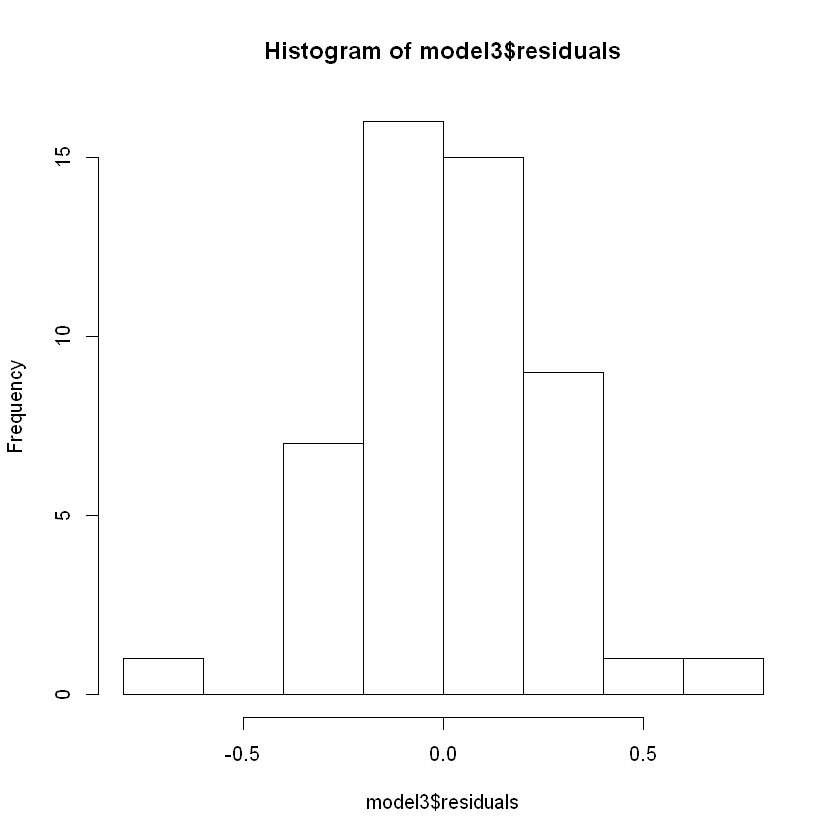

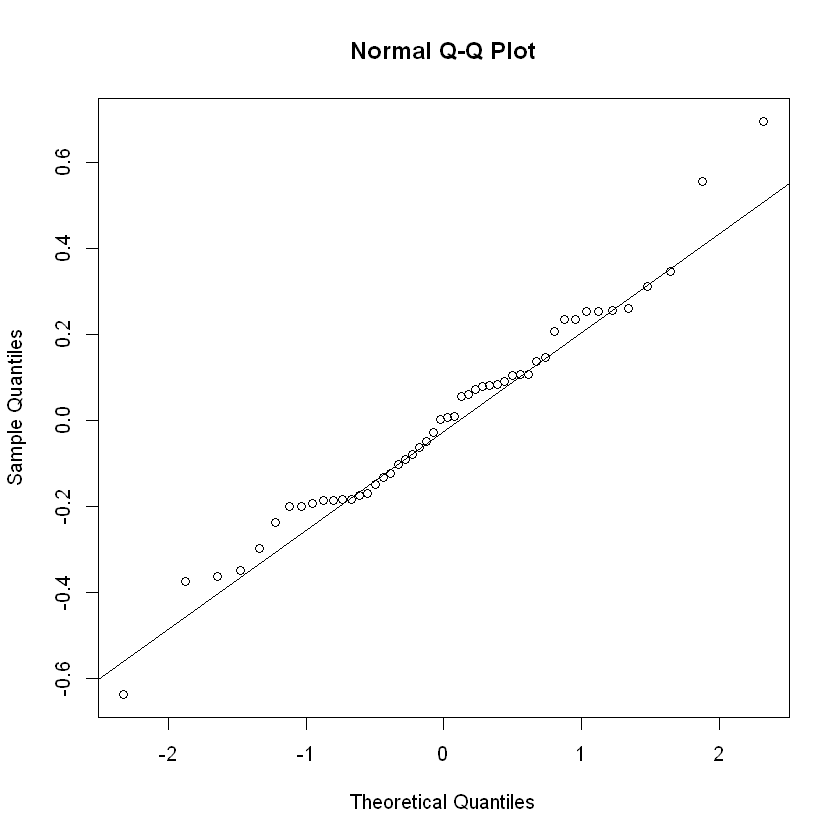

In [10]:
# model3 = lm(log(response) ~ as.factor(a) + f + index, data=train)
model3 = lm(response ~ b + c + d + e + f + g + h + i + j, data=train[101:150,])
anova(model3)
Anova(model3)
summary(model3)

hist(model3$residuals)
qqnorm(model3$residuals)
qqline(model3$residuals)

In [11]:
cor(train[101:150,])

Warning message in cor(train[101:150, ]):
"the standard deviation is zero"

,a,b,c,d,e,f,g,h,i,j,response,index
a,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
b,NA,1.00000000,0.11744845,0.07919680,-0.170696571,0.11584737,-0.07908339,-0.01988695,-0.03686729,-0.06979436,0.14818853,0.135394209
c,NA,0.11744845,1.00000000,-0.06818489,0.046593460,-0.15341033,0.14385905,0.08756695,-0.18956754,-0.16186187,0.11321983,-0.049469538
d,NA,0.07919680,-0.06818489,1.00000000,-0.046881604,-0.06588092,-0.07311564,0.05394851,-0.20921222,-0.09659448,0.09399954,-0.062867247
e,NA,-0.17069657,0.04659346,-0.04688160,1.000000000,0.11200672,-0.02053551,0.43711485,0.10990023,0.17515905,-0.11606487,-0.007581967
f,NA,0.11584737,-0.15341033,-0.06588092,0.112006716,1.00000000,-0.05982178,0.14262101,0.07226051,-0.04060933,-0.15337684,-0.068917122
g,NA,-0.07908339,0.14385905,-0.07311564,-0.020535511,-0.05982178,1.00000000,0.04523206,0.16296495,0.07713795,-0.10948661,-0.149461193
h,NA,-0.01988695,0.08756695,0.05394851,0.437114850,0.14262101,0.04523206,1.00000000,0.14376126,-0.02426599,0.08114309,0.139589053
i,NA,-0.03686729,-0.18956754,-0.20921222,0.109900234,0.07226051,0.16296495,0.14376126,1.00000000,0.13753754,-0.13399173,-0.229872867
j,NA,-0.06979436,-0.16186187,-0.09659448,0.175159047,-0.04060933,0.07713795,-0.02426599,0.13753754,1.00000000,-0.20569261,-0.048751057


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
b,1,0.07315454,0.07315454,1.3169759,0.257630552
e,1,0.02827061,0.02827061,0.5089459,0.479541063
f,1,0.08609296,0.08609296,1.5499018,0.220051742
g,1,0.03957605,0.03957605,0.7124739,0.403406013
i,1,0.02848251,0.02848251,0.5127608,0.477908853
j,1,0.10238502,0.10238502,1.8432021,0.181826246
index,1,0.64033663,0.64033663,11.5277589,0.001508499
Residuals,42,2.33298932,0.05554736,NA,NA


,Sum Sq,Df,F value,Pr(>F)
b,0.018788764,1,0.33824761,0.563951137
e,0.009778301,1,0.17603538,0.676941175
f,0.057678418,1,1.03836462,0.314036242
g,0.003602261,1,0.06485026,0.800230706
i,0.001173758,1,0.02113076,0.885118690
j,0.094955639,1,1.70945353,0.198168627
index,0.640336627,1,11.52775888,0.001508499
Residuals,2.332989316,42,NA,NA



Call:
lm(formula = response ~ b + e + f + g + i + j + index, data = train[101:150, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60915 -0.11979 -0.01701  0.14695  0.49908 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.516929   0.305260   1.693  0.09778 . 
b            0.073558   0.126477   0.582  0.56395   
e           -0.053851   0.128350  -0.420  0.67694   
f           -0.153063   0.150208  -1.019  0.31404   
g           -0.035951   0.141173  -0.255  0.80023   
i            0.021839   0.150236   0.145  0.88512   
j           -0.139056   0.106355  -1.307  0.19817   
index        0.008210   0.002418   3.395  0.00151 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2357 on 42 degrees of freedom
Multiple R-squared:  0.2997,	Adjusted R-squared:  0.183 
F-statistic: 2.567 on 7 and 42 DF,  p-value: 0.02691


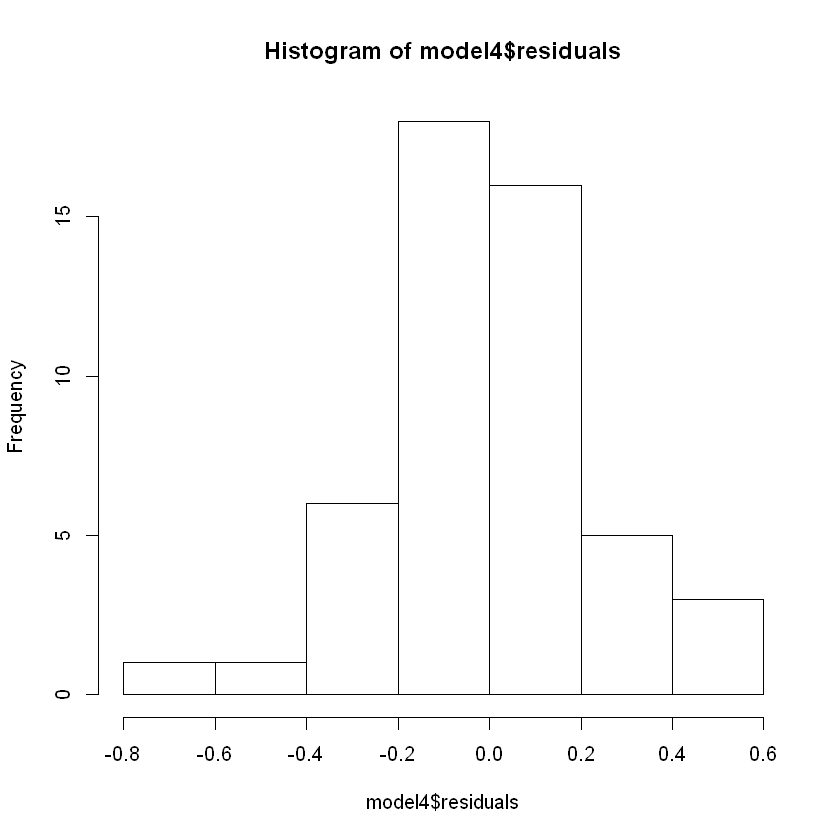

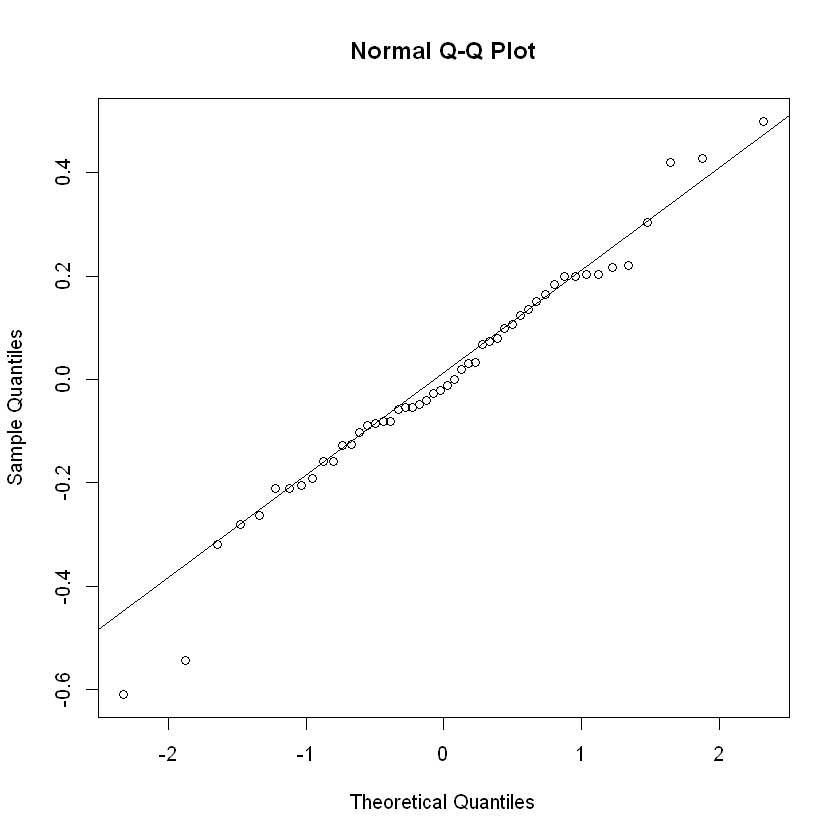

In [12]:
model4 = lm(response ~ b + e + f + g + i + j + index, data=train[101:150,])
anova(model4)
Anova(model4)
summary(model4)

hist(model4$residuals)
qqnorm(model4$residuals)
qqline(model4$residuals)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
index,1,0.7941362,0.79413619,15.02415,0.0003218314
Residuals,48,2.5371514,0.05285732,NA,NA


,Sum Sq,Df,F value,Pr(>F)
index,0.7941362,1,15.02415,0.0003218314
Residuals,2.5371514,48,NA,NA



Call:
lm(formula = response ~ index, data = train[101:150, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55813 -0.15646  0.00736  0.14965  0.52252 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.444894   0.284624   1.563 0.124600    
index       0.008733   0.002253   3.876 0.000322 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2299 on 48 degrees of freedom
Multiple R-squared:  0.2384,	Adjusted R-squared:  0.2225 
F-statistic: 15.02 on 1 and 48 DF,  p-value: 0.0003218


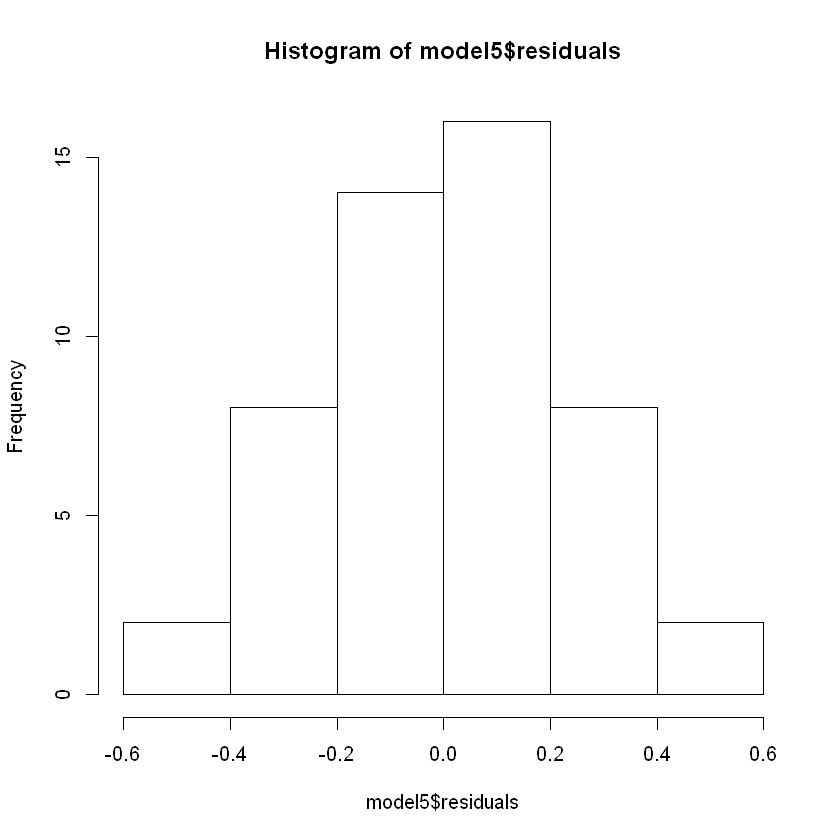

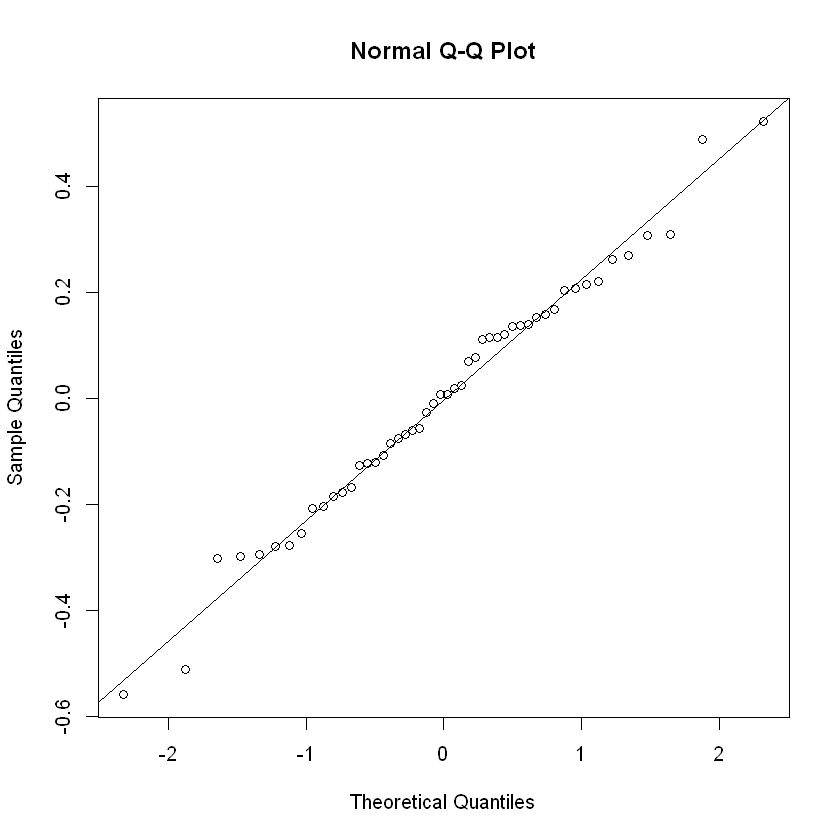

In [13]:
model5 = lm(response ~ index, data=train[101:150,])
anova(model5)
Anova(model5)
summary(model5)

hist(model5$residuals)
qqnorm(model5$residuals)
qqline(model5$residuals)

In [14]:
train_subset = train[101:150,]

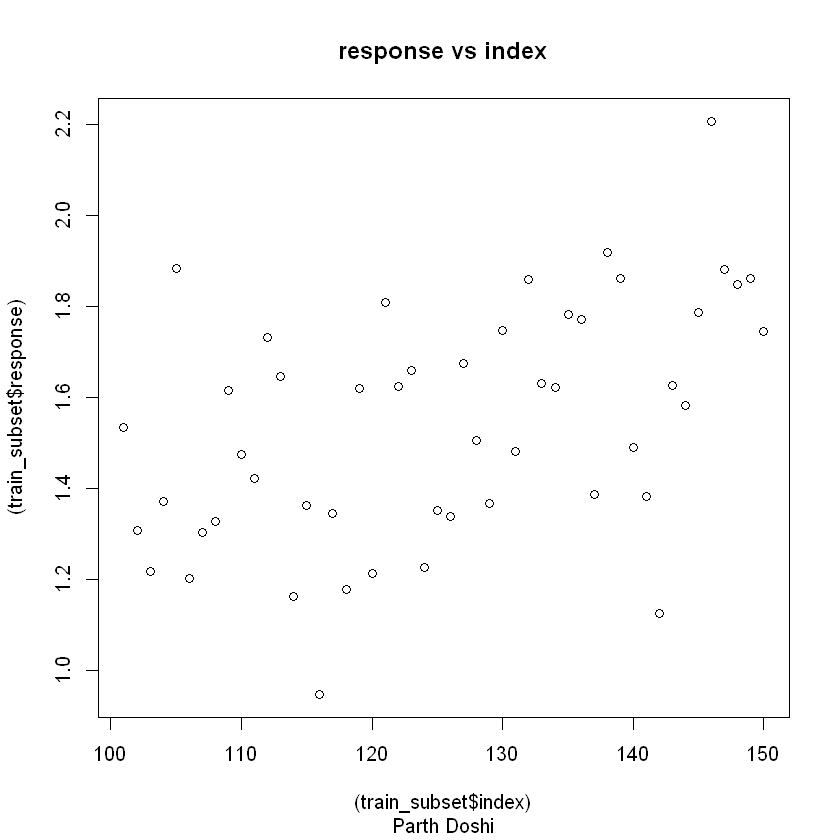

In [25]:
plot((train_subset$index), (train_subset$response), sub="Parth Doshi", main="response vs index")
# plot(response ~ b*c*d*e*f*g*h*i*j, data=train_subset)
# plot((train_subset$b), (train_subset$response))
# plot((train_subset$c), (train_subset$response))
# plot((train_subset$d), (train_subset$response))
# plot((train_subset$e), (train_subset$response))
# plot((train_subset$f), (train_subset$response))
# plot((train_subset$g), (train_subset$response))
# plot((train_subset$h), (train_subset$response))
# plot((train_subset$i), (train_subset$response))
# plot((train_subset$j), (train_subset$response))

In [16]:
cor(train_subset)

Warning message in cor(train_subset):
"the standard deviation is zero"

,a,b,c,d,e,f,g,h,i,j,response,index
a,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
b,NA,1.00000000,0.11744845,0.07919680,-0.170696571,0.11584737,-0.07908339,-0.01988695,-0.03686729,-0.06979436,0.14818853,0.135394209
c,NA,0.11744845,1.00000000,-0.06818489,0.046593460,-0.15341033,0.14385905,0.08756695,-0.18956754,-0.16186187,0.11321983,-0.049469538
d,NA,0.07919680,-0.06818489,1.00000000,-0.046881604,-0.06588092,-0.07311564,0.05394851,-0.20921222,-0.09659448,0.09399954,-0.062867247
e,NA,-0.17069657,0.04659346,-0.04688160,1.000000000,0.11200672,-0.02053551,0.43711485,0.10990023,0.17515905,-0.11606487,-0.007581967
f,NA,0.11584737,-0.15341033,-0.06588092,0.112006716,1.00000000,-0.05982178,0.14262101,0.07226051,-0.04060933,-0.15337684,-0.068917122
g,NA,-0.07908339,0.14385905,-0.07311564,-0.020535511,-0.05982178,1.00000000,0.04523206,0.16296495,0.07713795,-0.10948661,-0.149461193
h,NA,-0.01988695,0.08756695,0.05394851,0.437114850,0.14262101,0.04523206,1.00000000,0.14376126,-0.02426599,0.08114309,0.139589053
i,NA,-0.03686729,-0.18956754,-0.20921222,0.109900234,0.07226051,0.16296495,0.14376126,1.00000000,0.13753754,-0.13399173,-0.229872867
j,NA,-0.06979436,-0.16186187,-0.09659448,0.175159047,-0.04060933,0.07713795,-0.02426599,0.13753754,1.00000000,-0.20569261,-0.048751057


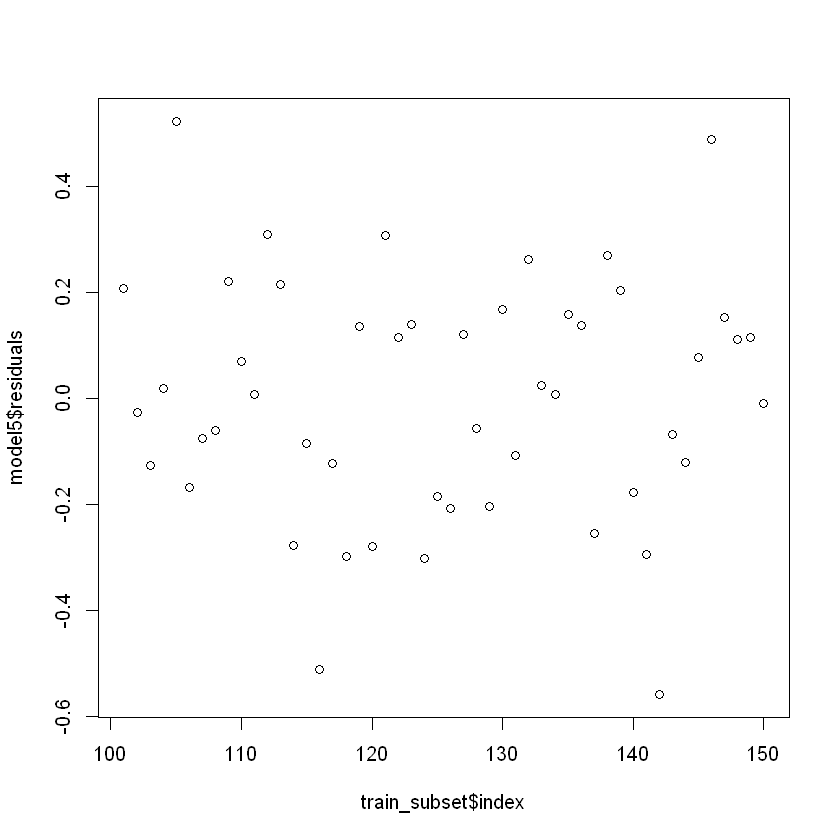

In [17]:
plot(train_subset$index, model5$residuals)

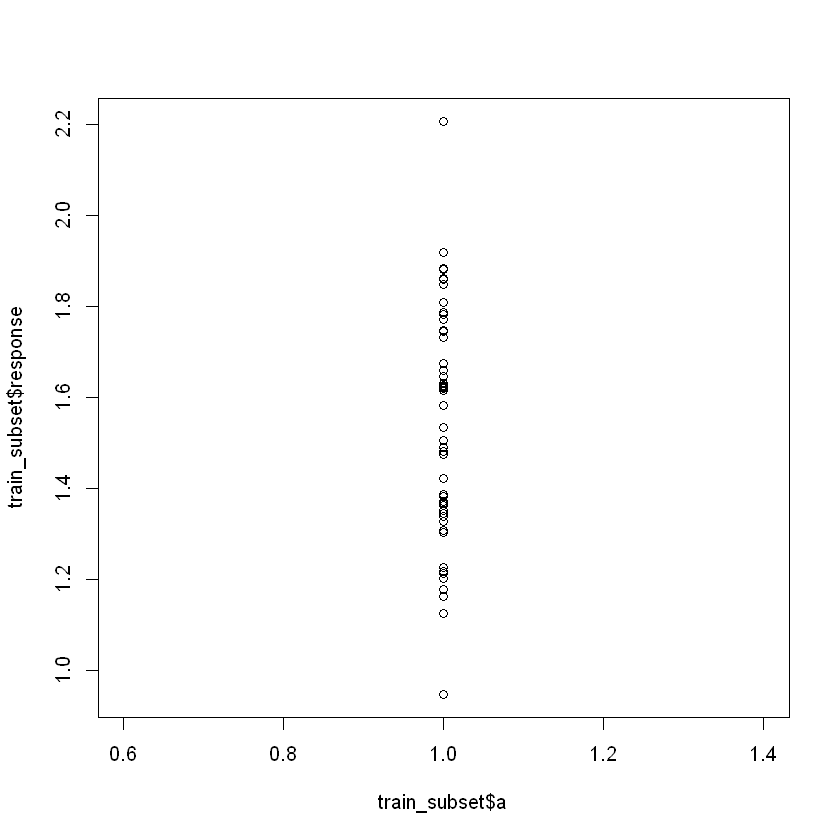

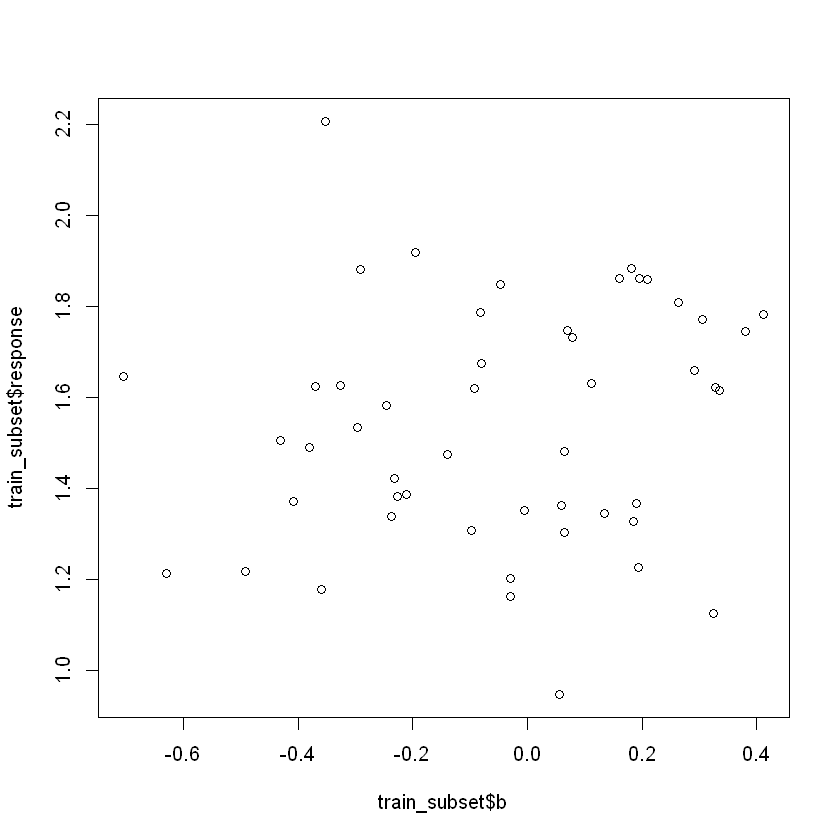

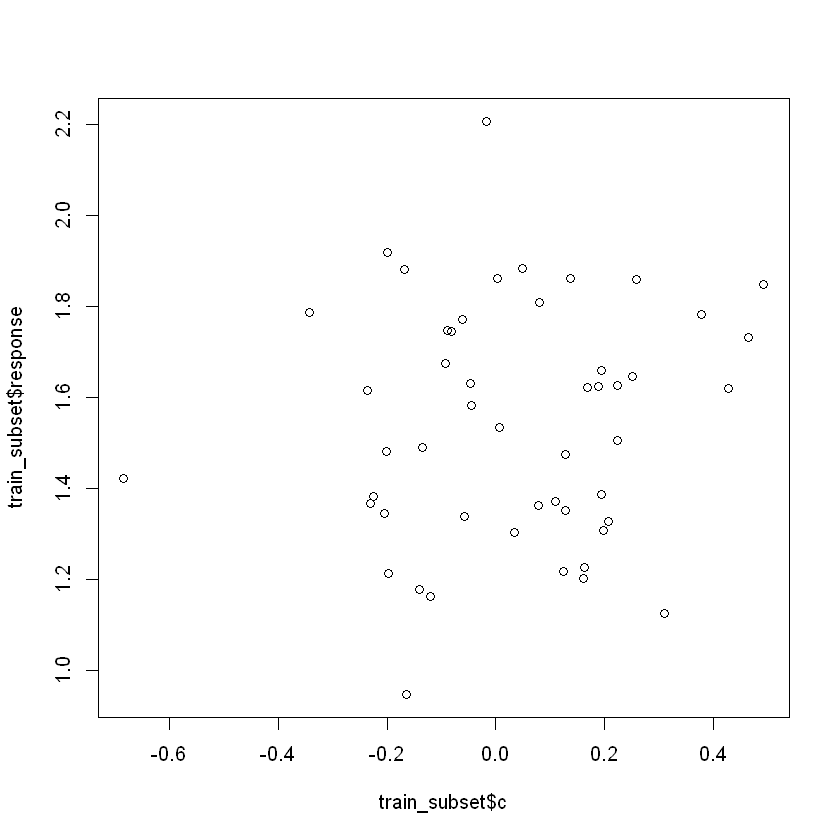

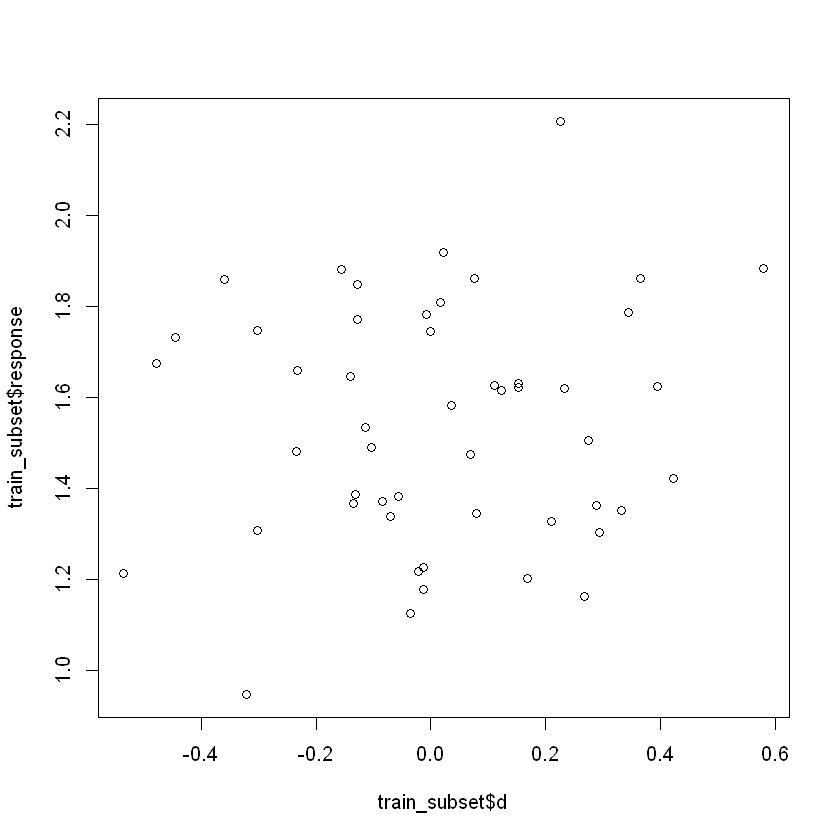

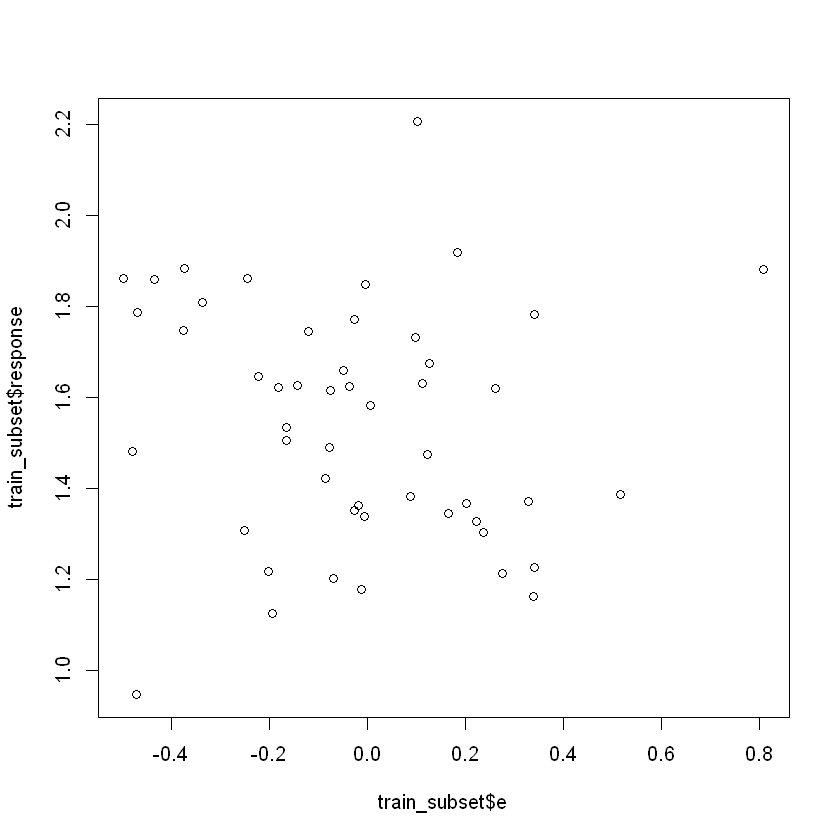

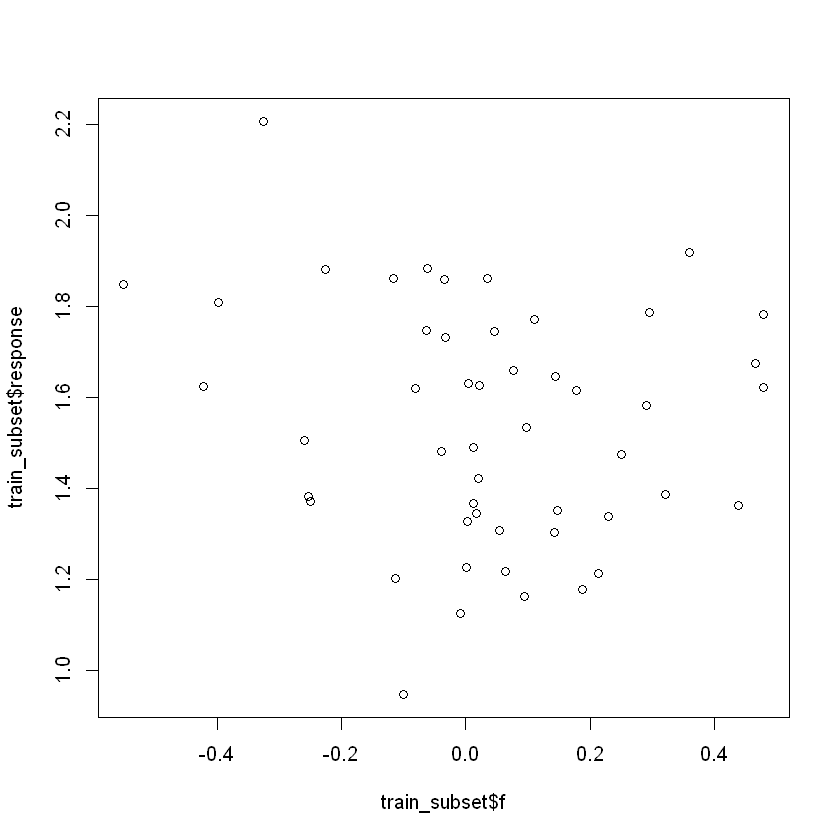

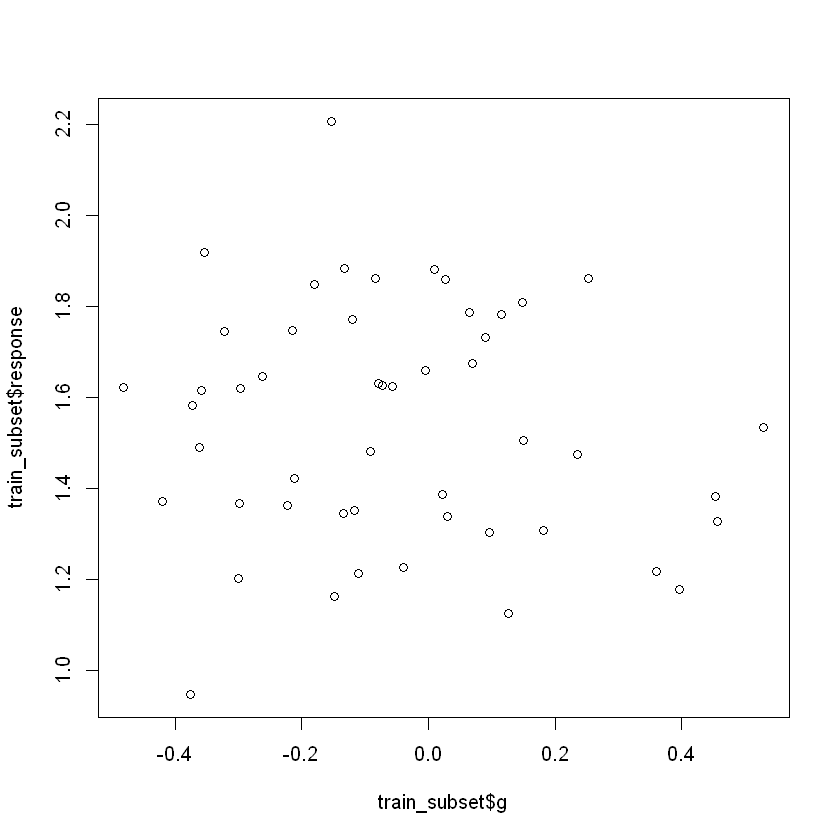

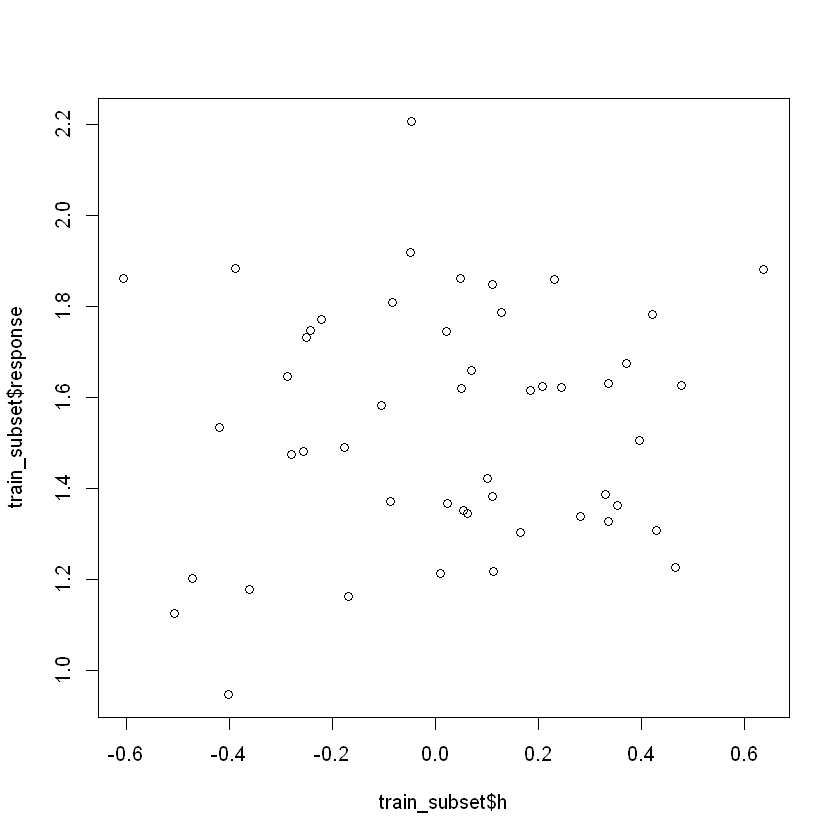

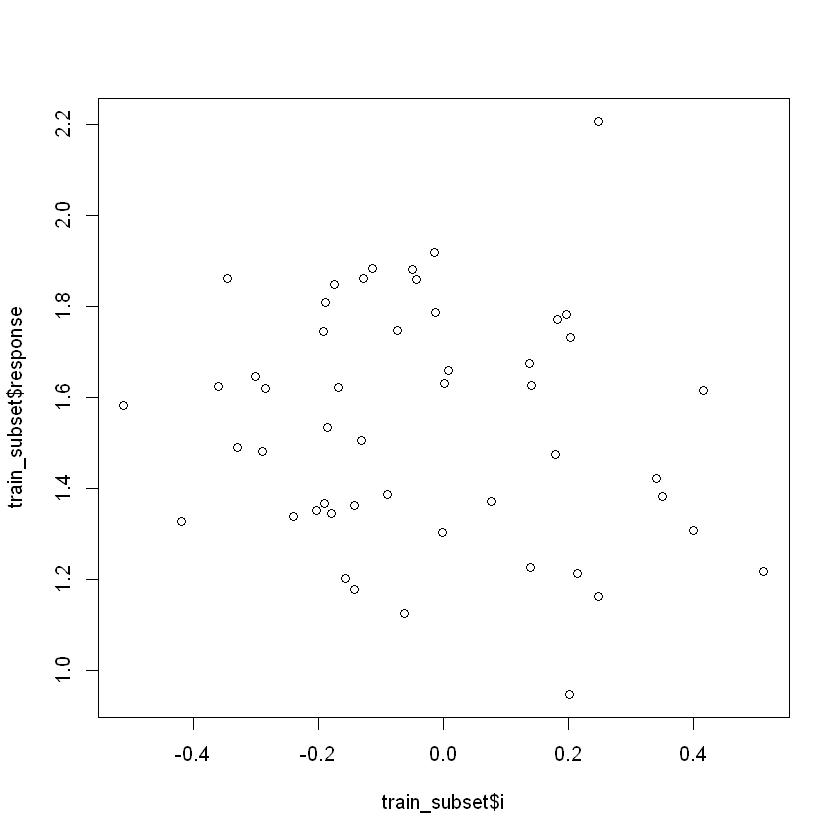

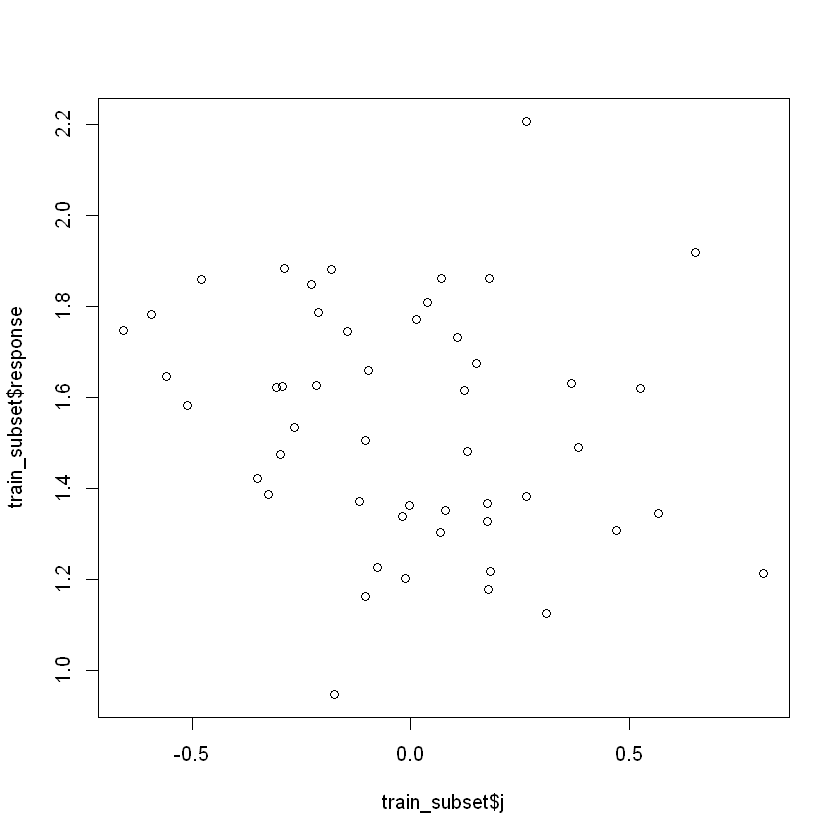

In [18]:
plot(train_subset$a, train_subset$response)
plot(train_subset$b, train_subset$response)
plot(train_subset$c, train_subset$response)
plot(train_subset$d, train_subset$response)
plot(train_subset$e, train_subset$response)
plot(train_subset$f, train_subset$response)
plot(train_subset$g, train_subset$response)
plot(train_subset$h, train_subset$response)
plot(train_subset$i, train_subset$response)
plot(train_subset$j, train_subset$response)

In [19]:
predict_test_model2 = predict(model2, test_x)
predict_test_model3 = predict(model3, test_x)
predict_test_model4 = predict(model4, test_x)
predict_test_model5 = predict(model5, test_x)

sum((predict_test_model2 - test_y) ** 2)
mean(((predict_test_model2 - test_y) ** 2)$response)

sum((predict_test_model3 - test_y) ** 2)
mean(((predict_test_model3 - test_y) ** 2)$response)

sum((predict_test_model4 - test_y) ** 2)
mean(((predict_test_model4 - test_y) ** 2)$response)

sum((predict_test_model5 - test_y) ** 2)
mean(((predict_test_model5 - test_y) ** 2)$response)

[1] 1497.714

[1] 29.95429

[1] 17.21403

[1] 0.3442807

[1] 2.498677

[1] 0.04997354

[1] 2.108823

[1] 0.04217646

In [20]:
data.frame("predicted"=predict_test_model5, "real"=test_y$response)

,predicted,real
151,1.763596,2.158941
152,1.772330,2.330793
153,1.781063,2.081419
154,1.789796,1.859214
155,1.798529,2.066007
156,1.807262,2.055083
157,1.815995,1.735900
158,1.824728,1.573385
159,1.833462,2.069271
160,1.842195,2.226361


In [21]:
write.table(predict_test_model5, file="PR2_submit.dat", col.names = F, row.names = F)